# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

#### מספר שאלון - 12

In [1]:
id1 = "206073124"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [45]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Q1 

#### הצגת איור המתאר את התפלגות מספר הלילות בסופישבוע.
השתמשתי כאן בלוג על מנת שנוכל לראות את הפיזור בצורה טובה יותר במצבים של מעל 4 לילות

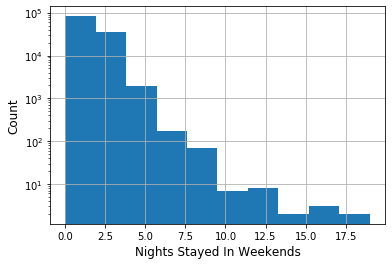

In [97]:
data['stays_in_weekend_nights'].hist()
plt.yscale('log')
plt.xlabel("Nights Stayed In Weekends",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

 # Q2

#### בשאלה זו חתכתי את הדאטה לפי שני תנאים - חודש אוגוסט ומספר תינוקות גדול מ0

In [43]:
augdata = data[(data['arrival_date_month'].str.contains('August')) & (data['babies'] > 0)].reset_index(drop= True).copy()
augdata.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,131,2015,August,32,3,2,5,2,...,No Deposit,177.0,NaN,0,Transient,119.70,0,1,Canceled,2015-03-28
1,Resort Hotel,0,13,2015,August,32,4,0,4,2,...,No Deposit,NaN,NaN,0,Transient-Party,230.50,0,2,Check-Out,2015-08-08
2,Resort Hotel,0,84,2015,August,32,5,2,5,2,...,No Deposit,240.0,NaN,0,Transient,168.71,0,3,Check-Out,2015-08-12
3,Resort Hotel,0,116,2015,August,32,7,2,5,2,...,No Deposit,5.0,NaN,0,Transient,133.50,1,2,Check-Out,2015-08-14
4,Resort Hotel,0,126,2015,August,32,8,2,5,2,...,No Deposit,261.0,NaN,0,Transient,133.00,1,2,Check-Out,2015-08-15


In [42]:
print("The number of rows for my data is: " , len(augdata))

The number of rows for my data is:  195


# Q3

#### בשאלה זו הצגתי את ההשוואה דרך קאונטפלוט מכיוון שהוא מתאים להצגת נתונים בדידים ובינאריים

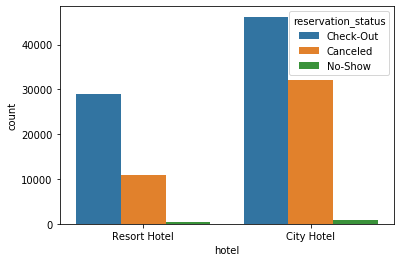

In [58]:
sns.countplot(x="hotel", hue="reservation_status", data=data)
plt.show()

# Q4

#### בשאלה זו יצרתי את הטבלה באמצעות הפיבוט טייבל כאשר באינדקס יהיו המלון והחודש, והמדידה תהיה ספירת המבוגרים

In [60]:
data.pivot_table(index = ['hotel','arrival_date_month'], values =['adults'] , aggfunc = sum ).round(1)

adults
hotel        arrival_date_month        
City Hotel   April                14290
             August               17841
             December              7609
             February              8846
             January               6378
             July                 15975
             June                 14519
             March                11858
             May                  14958
             November              7330
             October              13665
             September            13569
Resort Hotel April                 6516
             August                9954
             December              4773
             February              5604
             January               3646
             July                  9189
             June                  5834
             March                 5817
             May                   6581
             November              4158
             October               6614
             September             6112

# Q5

#### בשביל להבין את סוג הקורלציות שבהן כדאי להשתמש, הצגתי תחילה את הפיצ'רס באמצעות דנסיטי על מנת להבין מה סוגי ההתפלגויות שקיימות. 

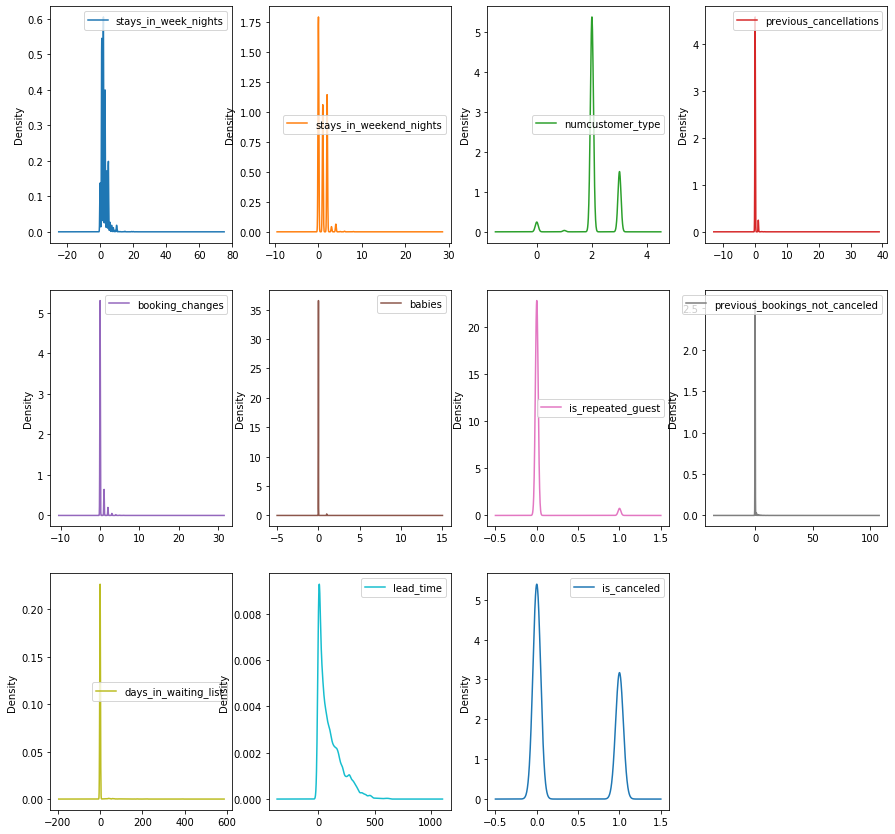

In [86]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights','numcustomer_type', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time', 'is_canceled' ]
data['numcustomer_type'] = data['customer_type'].astype('category').cat.codes
data[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(4,4), figsize=(15,20));

####  ניתן לראות שלאף ערך אין התפלגות נורמלית ולכן אעשה מפת חום לפי קנדל תאו ובה נמצא מה הקורלציות החדשות שלנו .

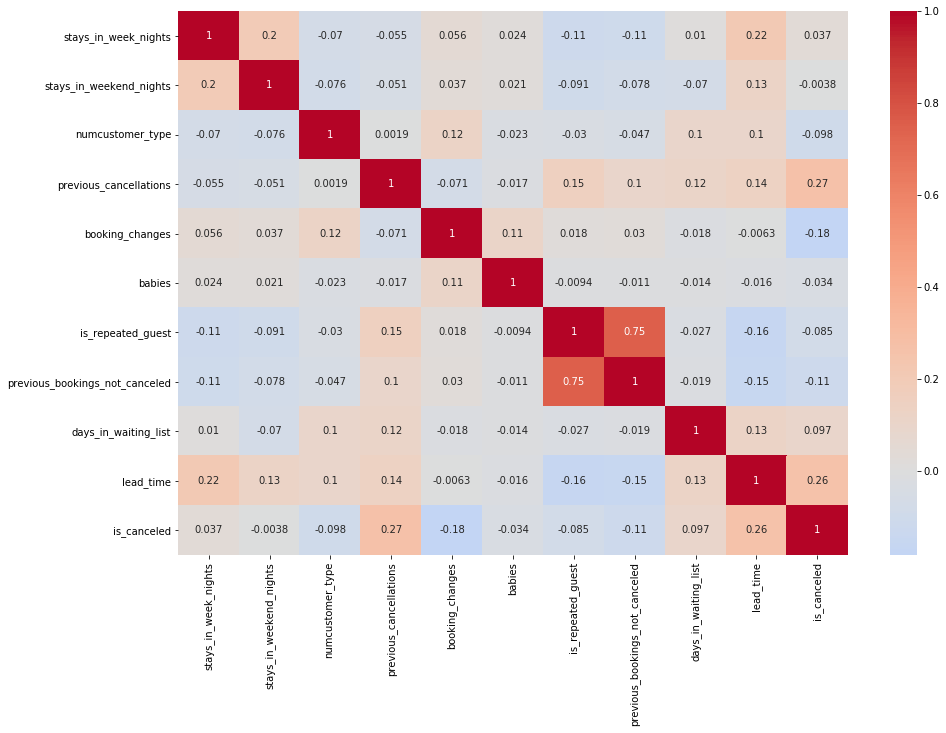

In [87]:
corrs = data[features].corr(method = 'kendall')

plt.figure(figsize=(15,10))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

ניתן לראות שהקורלציה השלישית הכי חזקה שווה 0.26 והיא בין העמודות : lead_time,is_canceled

lead_time = הזמן שעבר בין ההזמנה לבין ההגעה בפועל למלון

is_canceled = האם ההזמנה בוטלה

כעת ניצור scatterplot בניהן. 

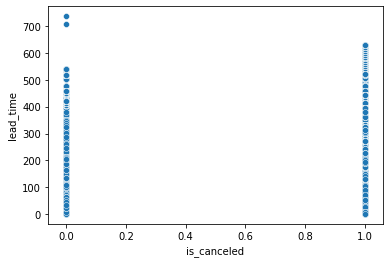

In [90]:
sns.scatterplot(x = "is_canceled",y = "lead_time",  data = data);

# Q6

#### בסעיף זה בניתי עץ החלטה של קלאסיפייר המתאים לנתונים שהם בדידים, לאחר מכן חישבתי את הדיוק של המודל באמצעות ACC שזה המדד המתאים לעצי החלטה מסוג זה.

In [94]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time']

model = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=42)
X = data[features]
y = data['is_canceled']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 

model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [96]:
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction, y_test)) 


The accuracy of the Decision Tree is 0.760951503476003


#### דיוק מקרי הוא בדיוק של 50% מכיוון שהתשובה היא כן או לא. רמת הדיוק שהתקבלה מהעץ היא כ76% ולכן הדיוק של עץ ההחלטה הוא טוב יותר מדיוק מקרי.


---
# GOOD LUCK !!!!
---

In [10]:
# do not type below this line